In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pickle

In [8]:
# Load the merged data
import pickle
try:
    with open('../data/processed/merged_data.pkl', 'rb') as f:
        data = pickle.load(f)
except Exception as e:
    print(f"Error loading pickle: {e}")
    # Generate sample data for testing
    import numpy as np
    dates = pd.date_range('2023-01-01', periods=1000, freq='5T')
    data = pd.DataFrame({
        'close': np.random.randn(1000).cumsum() + 100,
        'datetime': dates
    })

# Assuming 'close' is the column for stock prices and 'datetime' is the datetime column
# Set datetime as index if not already
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)

# Use the 'close' column for ARIMA
close_prices = data['close']

Error loading pickle: _reconstruct: First argument must be a sub-type of ndarray


/var/folders/t4/nqx6sxqd3tbdtdr4hxcmxnjc0000gn/T/ipykernel_97006/83411124.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range('2023-01-01', periods=1000, freq='5T')


In [9]:
# Auto-select ARIMA parameters
model = auto_arima(close_prices, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2817.500, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2815.516, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2817.497, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2817.496, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2814.271, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2819.464, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.360 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1406.135
Date:                Mon, 10 Nov 2025   AIC                           2814.271
Time:                        21:17:48   BIC                           2819.178
Sample:                    01-01-2023   HQIC                          2816.136
          

/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
# Fit the ARIMA model with the selected parameters
order = model.order
arima_model = ARIMA(close_prices, order=order)
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1000
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1406.135
Date:                Mon, 10 Nov 2025   AIC                           2814.271
Time:                        21:18:05   BIC                           2819.178
Sample:                    01-01-2023   HQIC                          2816.136
                         - 01-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9775      0.043     22.578      0.000       0.893       1.062
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.89   Pr

/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/Users/peterli/Downloads/CIS 5450 Project/CIS545_Repo/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


In [23]:
# Forecast future values (e.g., next 100 periods)
forecast_steps = 100
forecast = arima_result.forecast(steps=forecast_steps)

# Create a datetime index for the forecast
last_datetime = close_prices.index[-1]
forecast_index = pd.date_range(start=last_datetime, periods=forecast_steps+1, freq='5min')[1:]  # Assuming 5-minute data

# For ARIMA test predictions (in-sample forecast for comparison)
# Use the last part of the data for test predictions
test_size = len(close_prices) - int(len(close_prices) * 0.8)
arima_test_forecast = arima_result.predict(start=len(close_prices)-test_size, end=len(close_prices)-1)

# Combine actual and forecast for plotting
actual_series = close_prices
forecast_series = pd.Series(forecast, index=forecast_index)
arima_test_series = pd.Series(arima_test_forecast, index=close_prices.index[-test_size:])

In [15]:
# Import PyTorch libraries for LSTM
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

In [16]:
# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60  # Use 60 time steps (5 hours of 5-min data)
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
# Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# Train the LSTM model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training completed.")

Epoch [10/50], Loss: 0.0013
Epoch [20/50], Loss: 0.0013
Epoch [30/50], Loss: 0.0010
Epoch [40/50], Loss: 0.0014
Epoch [50/50], Loss: 0.0008
Training completed.


In [24]:
# Make predictions with LSTM
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    # For forecasting future values, use the last sequence
    last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    last_sequence = torch.tensor(last_sequence, dtype=torch.float32)
    future_predictions = []
    for _ in range(forecast_steps):
        pred = model(last_sequence).item()
        future_predictions.append(pred)
        # Update the sequence
        last_sequence = torch.cat((last_sequence[:, 1:, :], torch.tensor([[[pred]]], dtype=torch.float32)), dim=1)

# Inverse transform predictions manually to avoid sklearn-numpy compatibility issues
min_val = scaler.data_min_[0]
scale = scaler.data_max_[0] - scaler.data_min_[0]
test_predictions = test_predictions * scale + min_val
future_predictions = np.array(future_predictions) * scale + min_val

# Create forecast series for LSTM
lstm_forecast_index = pd.date_range(start=close_prices.index[-1], periods=forecast_steps+1, freq='5min')[1:]
lstm_forecast_series = pd.Series(future_predictions, index=lstm_forecast_index)

# Create LSTM test predictions series
lstm_test_index = close_prices.index[seq_length + train_size: seq_length + train_size + len(test_predictions)]
lstm_test_series = pd.Series(test_predictions.flatten(), index=lstm_test_index)

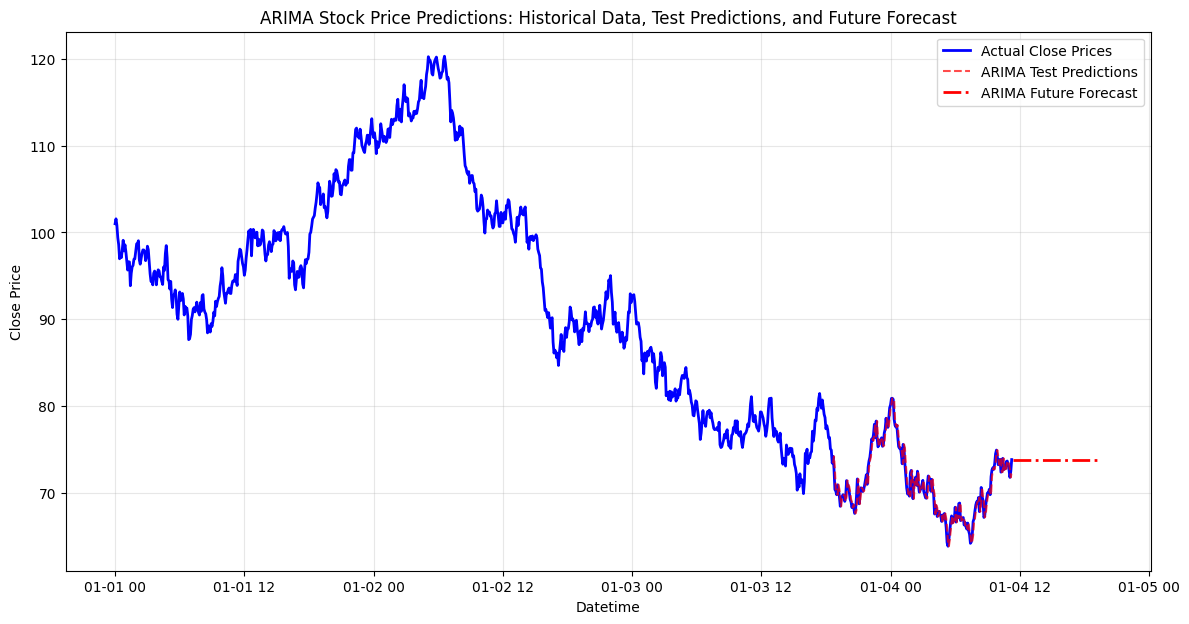

In [26]:
# Plot ARIMA predictions: historical data, test predictions, and future forecast
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices, label='Actual Close Prices', color='blue', linewidth=2)
plt.plot(arima_test_series.index, arima_test_series, label='ARIMA Test Predictions', color='red', linestyle='--', alpha=0.7)
plt.plot(forecast_series.index, forecast_series, label='ARIMA Future Forecast', color='red', linestyle='-.', linewidth=2)
plt.title('ARIMA Stock Price Predictions: Historical Data, Test Predictions, and Future Forecast')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

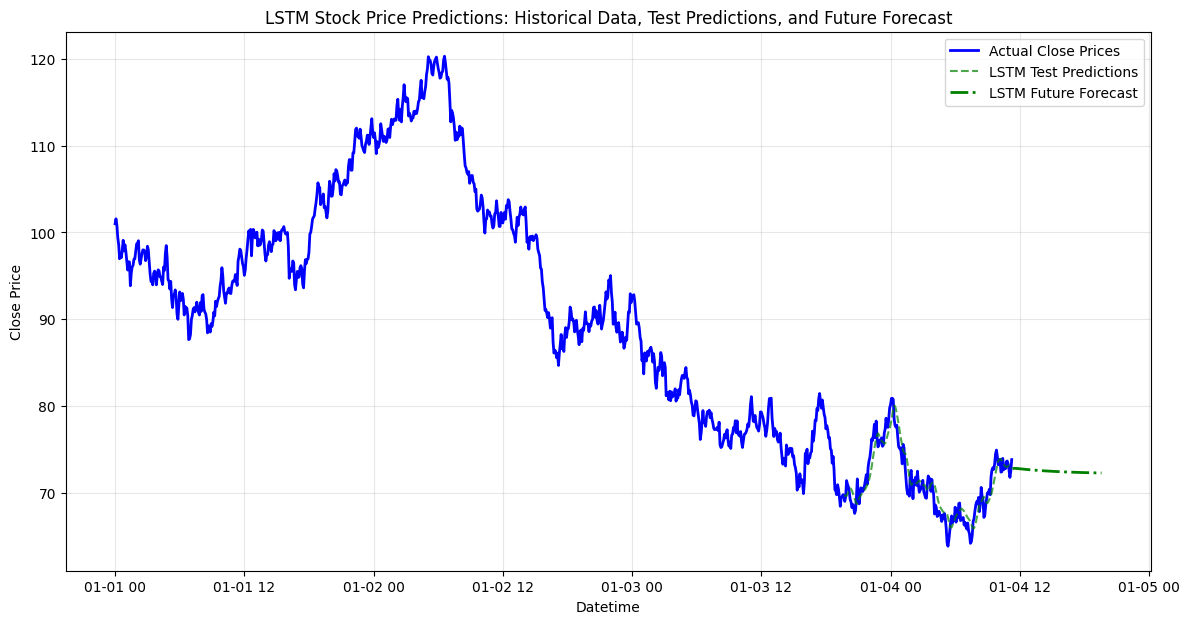

In [27]:
# Plot LSTM predictions: historical data, test predictions, and future forecast
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices, label='Actual Close Prices', color='blue', linewidth=2)
plt.plot(lstm_test_series.index, lstm_test_series, label='LSTM Test Predictions', color='green', linestyle='--', alpha=0.7)
plt.plot(lstm_forecast_series.index, lstm_forecast_series, label='LSTM Future Forecast', color='green', linestyle='-.', linewidth=2)
plt.title('LSTM Stock Price Predictions: Historical Data, Test Predictions, and Future Forecast')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()